> Proyecto académico de análisis exploratorio de datos utilizando Python y Jupyter Notebook.
# Heroes Data Analisis
Análisis exploratorio de datos usando Python y Pandas.

## Objetivo
Analizar información de héroes, aplicando limpieza y transformación de datos
para obtener visualizaciones y métricas descriptivas.

In [21]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Extracción de datos


In [22]:
df = pd.read_csv("data/heroes_information.csv")
df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## 2. Limpieza y transformación


In [23]:
ele=df.count()
df=df.replace("-", "Unknown")
df["Publisher"]= df["Publisher"].fillna("Unknown")
df["Weight"]=df["Weight"].fillna(0)
df["Eye color"]=df["Eye color"].str.capitalize()
df["Skin color"]=df["Skin color"].str.capitalize()
df["Alignment"]=df["Alignment"].str.capitalize()
df=df.drop_duplicates()
df["Es humano"]=np.where(df["Race"]=="Human", "SI", "NO")
df["Categoria Altura"]=pd.cut(df["Height"], bins=[-100,0,160,185,210], labels=["Indefinido","Bajo","Medio","Alto"])
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Es humano,Categoria Altura
0,0,A-Bomb,Male,Yellow,Human,No Hair,203.0,Marvel Comics,Unknown,Good,441.0,SI,Alto
1,1,Abe Sapien,Male,Blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,Blue,Good,65.0,NO,Alto
2,2,Abin Sur,Male,Blue,Ungaran,No Hair,185.0,DC Comics,Red,Good,90.0,NO,Medio
3,3,Abomination,Male,Green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,Bad,441.0,NO,Alto
4,4,Abraxas,Male,Blue,Cosmic Entity,Black,-99.0,Marvel Comics,Unknown,Bad,-99.0,NO,Indefinido


## 3. Análisis exploratorio


### 3.1 Héroes con peso entre 100 y 110


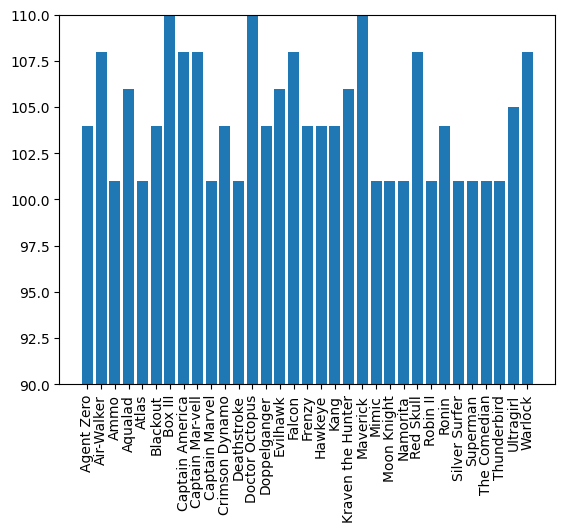

In [24]:
df_peso=df[(df["Weight"]>=100) & (df["Weight"]<=110)]
plt.bar(df_peso["name"],df_peso["Weight"])
plt.ylim(90,110)
plt.xticks(rotation=90)
plt.show()

### 3.2 Porcentaje de héroes humanos


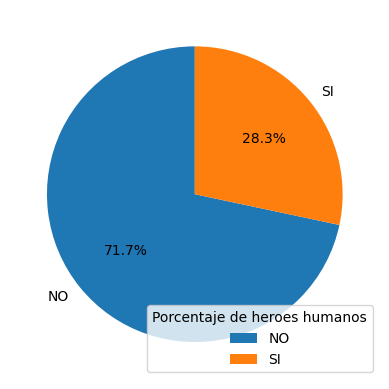

In [25]:
esHum= df["Es humano"].value_counts()
plt.pie(esHum, labels= esHum.index, autopct='%1.1f%%',startangle=90 )
plt.legend(esHum.index,title="Porcentaje de heroes humanos", loc="lower right")

plt.show()

## 4. Estadísticas descriptivas del peso
Se calculan el promedio, la mediana y la desviación estándar del peso de los héroes.

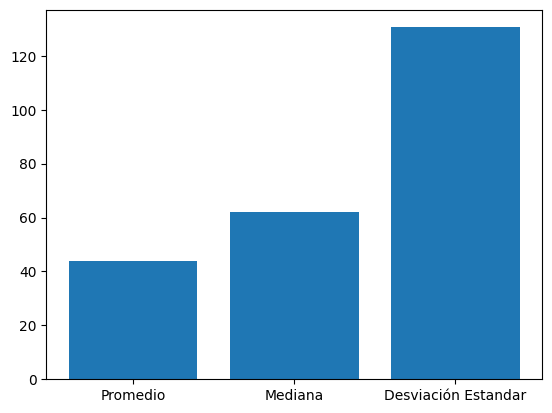

In [26]:
pesopro=np.mean(df["Weight"])
pesomed=np.median(df["Weight"])
pesodev=np.std(df["Weight"])

plt.bar(["Promedio", "Mediana", "Desviación Estandar"],[pesopro,pesomed,pesodev])
plt.show()

## 5. Peso Minimo, Promedio y Maximo de los Heroes

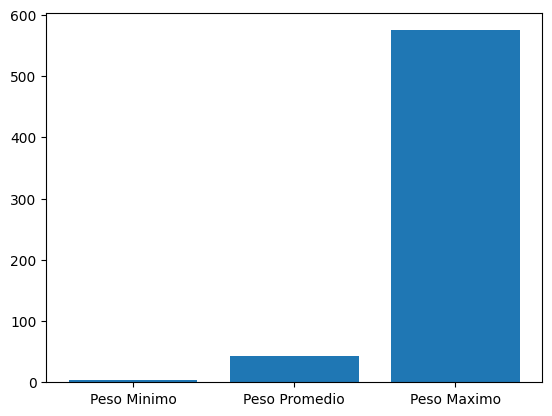

In [27]:
pesomax=np.argmax(df["Weight"])
pesomin=np.argmin(df["Weight"])
pesoprom=np.mean(df["Weight"])

plt.bar(["Peso Minimo", "Peso Promedio", "Peso Maximo"], [pesomin,pesoprom,pesomax])
plt.show()

## 6. Distribución por categoría de altura

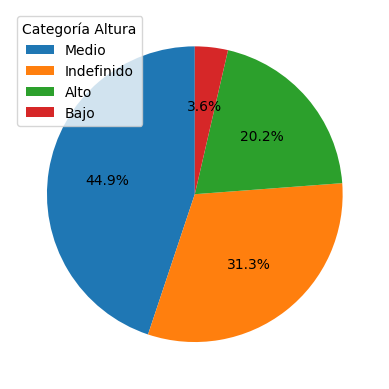

In [28]:
catAlt=df["Categoria Altura"].value_counts()
plt.pie(catAlt, labels=None,autopct='%1.1f%%', startangle=90)
plt.legend(catAlt.index, title="Categoría Altura")
plt.show()

## Conclusiones
- La mayoría de los héroes analizados pertenecen a la categoría de altura media y alta.
- Se observa una diferencia clara entre héroes humanos y no humanos.
- El peso presenta alta dispersión debido a valores extremos.
- El proyecto demuestra un flujo de extracción y transformación de datos en Jupyter Notebook.